![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# Proyecto final - Data Analytics y Business Intelligence

Recibimos dos datasets:

1. `renfe.csv`: Información de búsquedas de billetes que se ha extrajo de la página de Renfe.
2. `coordenadas_ciudades.csv`: Latitud y longitud de provincias españolas.

Queremos usar estos datasets para un modelo de Machine Learning que utilizaremos para predecir los precios de los billetes. Y, para ello, necesitamos limpiar, explorar y pre-procesar el dataset.

## Reglas de juego

1. El proyecto se debe entregar en grupos de dos o individualmente. 
2. Cada respuesta correcta suma un punto.
3. La calificación final consistirá en la suma de todos los puntos obtenidos sobre el total de puntos posibles.


## Diccionario de datos

Esta es la información provista:

### `renfe.csv`
- `FECHA_CONSULTA`: Fecha en la que se consultó la página.
- `FECHA_INICIO`: Fecha de inicio del trayecto.
- `FECHA_FIN`: Fecha de finalización del trayecto.
- `CIUDAD_ORIGEN`: Ciudad de origen del trayecto.
- `CIUDAD_DESTINO`: Ciudad destino del trayecto.
- `TIPO_TREN`: Tipo de tren.
- `TIPO_TARIFA`: Tipo de tarifa del billete.
- `CLASE`: Clase del asiento seleccionado.
- `PRECIO`: Precio del tren seleccionado.

### `coordenadas_ciudades.csv`
- `ciudad`: Nombre de la ciudad.
- `latitud`: Coordenada de latitud de la ciudad.
- `longitud`: Coordenada de longitud de la ciudad.

## Importar librerías

## P0: Lee el dataset `renfe.csv`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

df_renfe = pd.read_csv("data/renfe.csv",sep=";")


## P1: Visualiza las primeras y las últimas filas del dataset

In [3]:
print(df_renfe.head())

print(df_renfe.tail())

        FECHA_CONSULTA         FECHA_INICIO            FECHA_FIN  \
0  2019-05-25 01:43:03  2019-06-28 20:36:00  2019-06-28 23:14:00   
1  2019-06-22 13:05:11  2019-07-14 10:00:00  2019-07-14 13:10:00   
2  2019-04-17 06:24:03  2019-05-23 13:40:00  2019-05-23 16:10:00   
3  2019-05-10 21:21:59  2019-05-29 14:50:00  2019-05-29 22:30:00   
4  2019-05-09 19:43:37  2019-06-26 13:25:00  2019-06-26 16:24:00   

  CIUDAD_ORIGEN CIUDAD_DESTINO TIPO_TREN TIPO_TARIFA    CLASE  PRECIO  
0       SEVILLA         MADRID     ALVIA    Flexible  Turista   67.20  
1     BARCELONA         MADRID       AVE    Flexible  Turista  107.70  
2       SEVILLA         MADRID       AVE       Promo  Turista   47.30  
3      VALENCIA         MADRID  REGIONAL  Adulto ida  Turista   28.35  
4        MADRID      BARCELONA   AVE-TGV       Promo  Turista   66.75  
             FECHA_CONSULTA         FECHA_INICIO            FECHA_FIN  \
383563  2019-05-06 05:11:53  2019-05-10 19:40:00  2019-05-10 21:29:00   
383564  2019-

## P2: ¿Cuantas filas y columnas tiene el dataset?

In [4]:
filas, columnas = df_renfe.shape

print(f"El dataset tiene {filas} filas y {columnas} columnas")


El dataset tiene 383568 filas y 9 columnas


## P3: Cambia los nombres de todas las columnas a minúsculas

In [5]:
df_renfe.columns = df_renfe.columns.str.lower()

# Imprimir el DataFrame con los nombres de columnas en minúsculas
print(df_renfe)

             fecha_consulta         fecha_inicio            fecha_fin  \
0       2019-05-25 01:43:03  2019-06-28 20:36:00  2019-06-28 23:14:00   
1       2019-06-22 13:05:11  2019-07-14 10:00:00  2019-07-14 13:10:00   
2       2019-04-17 06:24:03  2019-05-23 13:40:00  2019-05-23 16:10:00   
3       2019-05-10 21:21:59  2019-05-29 14:50:00  2019-05-29 22:30:00   
4       2019-05-09 19:43:37  2019-06-26 13:25:00  2019-06-26 16:24:00   
...                     ...                  ...                  ...   
383563  2019-05-06 05:11:53  2019-05-10 19:40:00  2019-05-10 21:29:00   
383564  2019-06-19 21:48:56  2019-08-05 20:00:00  2019-08-05 23:10:00   
383565  2019-04-24 23:21:44  2019-04-29 16:15:00  2019-04-29 17:55:00   
383566  2019-05-27 21:05:19  2019-07-07 15:00:00  2019-07-07 17:21:00   
383567  2019-05-27 15:04:14  2019-06-16 18:35:00  2019-06-16 20:21:00   

       ciudad_origen ciudad_destino tipo_tren tipo_tarifa       clase  precio  
0            SEVILLA         MADRID     ALV

## P4: Muestra los tipos de datos de cada columna

In [6]:
print(df_renfe.dtypes)

fecha_consulta     object
fecha_inicio       object
fecha_fin          object
ciudad_origen      object
ciudad_destino     object
tipo_tren          object
tipo_tarifa        object
clase              object
precio            float64
dtype: object


## P5: Cambia los tipos de datos que creas que creas incorrectos, por los tipos adecuados

In [7]:
# Convertir la columna DateTime a tipo datetime
df_renfe['fecha_consulta'] = pd.to_datetime(df_renfe['fecha_consulta'])
df_renfe['fecha_fin'] = pd.to_datetime(df_renfe['fecha_fin'])
df_renfe['fecha_inicio'] = pd.to_datetime(df_renfe['fecha_inicio'])
print(df_renfe.dtypes)

fecha_consulta    datetime64[ns]
fecha_inicio      datetime64[ns]
fecha_fin         datetime64[ns]
ciudad_origen             object
ciudad_destino            object
tipo_tren                 object
tipo_tarifa               object
clase                     object
precio                   float64
dtype: object


In [8]:
print(df_renfe.head())

       fecha_consulta        fecha_inicio           fecha_fin ciudad_origen  \
0 2019-05-25 01:43:03 2019-06-28 20:36:00 2019-06-28 23:14:00       SEVILLA   
1 2019-06-22 13:05:11 2019-07-14 10:00:00 2019-07-14 13:10:00     BARCELONA   
2 2019-04-17 06:24:03 2019-05-23 13:40:00 2019-05-23 16:10:00       SEVILLA   
3 2019-05-10 21:21:59 2019-05-29 14:50:00 2019-05-29 22:30:00      VALENCIA   
4 2019-05-09 19:43:37 2019-06-26 13:25:00 2019-06-26 16:24:00        MADRID   

  ciudad_destino tipo_tren tipo_tarifa    clase  precio  
0         MADRID     ALVIA    Flexible  Turista   67.20  
1         MADRID       AVE    Flexible  Turista  107.70  
2         MADRID       AVE       Promo  Turista   47.30  
3         MADRID  REGIONAL  Adulto ida  Turista   28.35  
4      BARCELONA   AVE-TGV       Promo  Turista   66.75  


## P6: Filas duplicadas

### P6.1: ¿Cuántas filas duplicadas tiene el dataset?

In [9]:
df_renfe_duplicadas = df_renfe[df_renfe.duplicated()]
df_renfe_duplicadas.shape
filasdup, columnasdup = df_renfe_duplicadas.shape
print(f"El dataset tiene {filasdup} filas duplicadas.")


El dataset tiene 33 filas duplicadas.


### P6.2: Quita las filas duplicadas

In [10]:
df_renfe_sd = df_renfe.drop_duplicates()
filasless, columnasless=df_renfe_sd.shape
print(f"El nuevo dataset tiene {filasless} filas.")
#33 filas menos

El nuevo dataset tiene 383535 filas.


## P7: Valores nulos y análisis de `precio`

### P7.1: ¿Que porcentaje de valores nulos hay por cada columna?

In [11]:

perc_null = (df_renfe_sd.isnull().sum() / df_renfe_sd.count()) * 100
perc_nullf = perc_null.map('{:.2f}%'.format)
print(perc_nullf)

fecha_consulta    0.00%
fecha_inicio      0.00%
fecha_fin         0.00%
ciudad_origen     0.00%
ciudad_destino    0.00%
tipo_tren         0.00%
tipo_tarifa       0.35%
clase             0.35%
precio            8.03%
dtype: object


### P7.2: ¿Cual es el mínimo, percentiles importantes (25%, 50%, 75%) y el máximo de `precio`?

In [12]:
df_renfe_sd.describe()


,precio
count,355020.000000
mean,61.436162
std,25.696218
min,0.000000
25%,41.200000
50%,58.150000
75%,76.300000
max,342.800000


In [13]:
valores = df_renfe_sd.describe()
minimo = valores.loc['min']
media = valores.loc['mean']
maximo = valores.loc['max']
percentil_25 = valores.loc['25%']
percentil_50 = valores.loc['50%']
percentil_75 = valores.loc['75%']
print('Mínimo:', minimo)
print('Máximo:', maximo)
print('Percentil 25:', percentil_25)
print('Percentil 50:', percentil_50)
print('Percentil 75:', percentil_75)


Mínimo: precio    0.0
Name: min, dtype: float64
Máximo: precio    342.8
Name: max, dtype: float64
Percentil 25: precio    41.2
Name: 25%, dtype: float64
Percentil 50: precio    58.15
Name: 50%, dtype: float64
Percentil 75: precio    76.3
Name: 75%, dtype: float64


### P7.3: ¿Hay algo raro en el valor mínimo de `precio`? Quita las filas con ese valor del dataset

In [34]:
renfe_zero= df_renfe_sd[df_renfe_sd['precio'] == 0]
renfe_zz= df_renfe_sd[df_renfe_sd['precio'] != 0]
print(renfe_zz)

            fecha_consulta        fecha_inicio           fecha_fin  \
0      2019-05-25 01:43:03 2019-06-28 20:36:00 2019-06-28 23:14:00   
1      2019-06-22 13:05:11 2019-07-14 10:00:00 2019-07-14 13:10:00   
2      2019-04-17 06:24:03 2019-05-23 13:40:00 2019-05-23 16:10:00   
3      2019-05-10 21:21:59 2019-05-29 14:50:00 2019-05-29 22:30:00   
4      2019-05-09 19:43:37 2019-06-26 13:25:00 2019-06-26 16:24:00   
...                    ...                 ...                 ...   
383563 2019-05-06 05:11:53 2019-05-10 19:40:00 2019-05-10 21:29:00   
383564 2019-06-19 21:48:56 2019-08-05 20:00:00 2019-08-05 23:10:00   
383565 2019-04-24 23:21:44 2019-04-29 16:15:00 2019-04-29 17:55:00   
383566 2019-05-27 21:05:19 2019-07-07 15:00:00 2019-07-07 17:21:00   
383567 2019-05-27 15:04:14 2019-06-16 18:35:00 2019-06-16 20:21:00   

       ciudad_origen ciudad_destino tipo_tren tipo_tarifa       clase  precio  
0            SEVILLA         MADRID     ALVIA    Flexible     Turista   67.20  

### P7.4: Reemplaza los valores nulos en `precio` por la media de esa columna

In [15]:
df_renfe_sd.loc[df_renfe_sd['precio'] == 0, 'precio'] = media

In [16]:

assert df_renfe_sd.precio.all() != 0


### P7.5: Quita las filas donde `clase` o `tipo_tarifa` sean nulos

In [17]:
filas_out = ['clase', 'tipo_tarifa']

df_renfe_fo = df_renfe_sd.dropna(subset=filas_out)

## P8: Tiempo de viaje

### P8.1: Calcula el tiempo de viaje en minutos (fecha_fin - fecha_inicio)

In [18]:
resta=df_renfe_fo["fecha_fin"]-df_renfe_fo["fecha_inicio"]
tiempo_de_viaje = resta.dt.total_seconds() / 60
print(tiempo_de_viaje)



0         158.0
1         190.0
2         150.0
3         460.0
4         179.0
          ...  
383563    109.0
383564    190.0
383565    100.0
383566    141.0
383567    106.0
Length: 382197, dtype: float64


### P8.2: Haz un histograma de la variable que acabas de crear (`tiempo_de_viaje`)

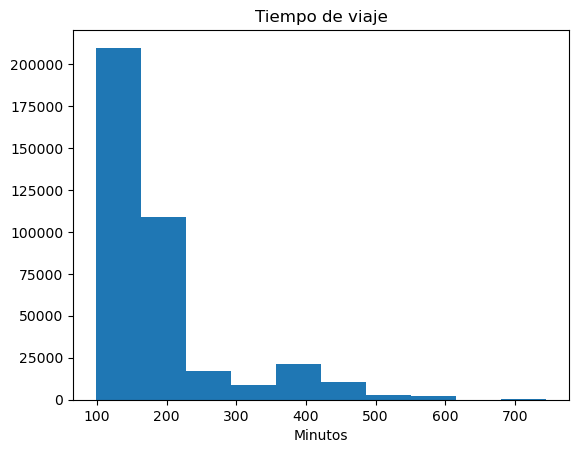

In [19]:
plt.hist(tiempo_de_viaje, bins=10)


plt.xlabel('Minutos')

plt.title('Tiempo de viaje')

plt.show()

## P9: Extrae el día, el nombre del día, el mes y la hora de `fecha_inicio`

In [20]:
print(df_renfe_fo["fecha_inicio"])
tiempo_de_viaje = resta.dt.total_seconds()
df_renfe_fo['hora'] = df_renfe_fo['fecha_inicio'].dt.strftime('%H:%M')
df_renfe_fo['dia'] = df_renfe_fo['fecha_inicio'].dt.day
df_renfe_fo['mes'] = df_renfe_fo['fecha_inicio'].dt.month_name()
df_renfe_fo['dia_semana'] = df_renfe_fo['fecha_inicio'].dt.day_name()


0        2019-06-28 20:36:00
1        2019-07-14 10:00:00
2        2019-05-23 13:40:00
3        2019-05-29 14:50:00
4        2019-06-26 13:25:00
                 ...        
383563   2019-05-10 19:40:00
383564   2019-08-05 20:00:00
383565   2019-04-29 16:15:00
383566   2019-07-07 15:00:00
383567   2019-06-16 18:35:00
Name: fecha_inicio, Length: 382197, dtype: datetime64[ns]


C:\Users\veneg\AppData\Local\Temp\ipykernel_2784\3909483733.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_renfe_fo['hora'] = df_renfe_fo['fecha_inicio'].dt.strftime('%H:%M')
C:\Users\veneg\AppData\Local\Temp\ipykernel_2784\3909483733.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_renfe_fo['dia'] = df_renfe_fo['fecha_inicio'].dt.day
C:\Users\veneg\AppData\Local\Temp\ipykernel_2784\3909483733.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [21]:
print(df_renfe_fo['hora'].head())
print(df_renfe_fo['dia'].head()) 
print(df_renfe_fo['mes'].head()) 
print(df_renfe_fo['dia_semana'].head()) 

0    20:36
1    10:00
2    13:40
3    14:50
4    13:25
Name: hora, dtype: object
0    28
1    14
2    23
3    29
4    26
Name: dia, dtype: int64
0    June
1    July
2     May
3     May
4    June
Name: mes, dtype: object
0       Friday
1       Sunday
2     Thursday
3    Wednesday
4    Wednesday
Name: dia_semana, dtype: object


## P10: Quita las columnas `fecha_consulta`, `fecha_inicio` y `fecha_fin` del dataset

In [22]:
renfe_sinfechas = df_renfe_fo.drop(['fecha_consulta', 'fecha_inicio','fecha_fin'], axis=1)
print(renfe_sinfechas.head())

  ciudad_origen ciudad_destino tipo_tren tipo_tarifa    clase  precio   hora  \
0       SEVILLA         MADRID     ALVIA    Flexible  Turista   67.20  20:36   
1     BARCELONA         MADRID       AVE    Flexible  Turista  107.70  10:00   
2       SEVILLA         MADRID       AVE       Promo  Turista   47.30  13:40   
3      VALENCIA         MADRID  REGIONAL  Adulto ida  Turista   28.35  14:50   
4        MADRID      BARCELONA   AVE-TGV       Promo  Turista   66.75  13:25   

   dia   mes dia_semana  
0   28  June     Friday  
1   14  July     Sunday  
2   23   May   Thursday  
3   29   May  Wednesday  
4   26  June  Wednesday  


## P11: Lee el dataset `coordenadas_ciudades.csv` y únelo con al dataset que has procesado hasta ahora (utiliza `ciudad_destino` para el `join`)

In [23]:
df_coordenadas = pd.read_csv("data/coordenadas_ciudades.csv")
df_coordenadas2 = df_coordenadas.rename(columns={'ciudad': 'ciudad_destino'})
renfe_join = pd.merge(renfe_sinfechas, df_coordenadas2,on='ciudad_destino',how='inner')
print(renfe_join.head())




  ciudad_origen ciudad_destino tipo_tren tipo_tarifa    clase  precio   hora  \
0       SEVILLA         MADRID     ALVIA    Flexible  Turista   67.20  20:36   
1     BARCELONA         MADRID       AVE    Flexible  Turista  107.70  10:00   
2       SEVILLA         MADRID       AVE       Promo  Turista   47.30  13:40   
3      VALENCIA         MADRID  REGIONAL  Adulto ida  Turista   28.35  14:50   
4       SEVILLA         MADRID       AVE       Promo  Turista   60.30  08:45   

   dia   mes dia_semana    latitud  longitud  
0   28  June     Friday  40.416705 -3.703582  
1   14  July     Sunday  40.416705 -3.703582  
2   23   May   Thursday  40.416705 -3.703582  
3   29   May  Wednesday  40.416705 -3.703582  
4   21  July     Sunday  40.416705 -3.703582  


## P12: Gráfica en un mapa el precio medio por ciudad de destino

In [24]:
#calculamos la media de precios por ciudad:

renfe_mapa = renfe_join.groupby('ciudad_destino').agg({'latitud': 'first', 'longitud': 'first', 'precio': 'mean'}).reset_index()
print(renfe_mapa.head())

  ciudad_destino    latitud  longitud     precio
0      BARCELONA  41.382894  2.177432  86.606999
1         MADRID  40.416705 -3.703582  60.646823
2     PONFERRADA  42.545412 -6.593872  45.044325
3        SEVILLA  37.388630 -5.995340  58.450816
4       VALENCIA  39.469901 -0.375951  41.481436


In [25]:



mapa = px.scatter_mapbox(renfe_mapa, lat="latitud", lon="longitud", hover_name="ciudad_destino", hover_data=["precio"],
                        color="precio", color_continuous_scale="Viridis",
                        mapbox_style="carto-positron", zoom=5)


mapa.show()

## P13: Haz una tabla de correlación, ¿hay variables númericas correladas con el precio?

In [26]:

# Calculamos la correlación con las diferentes variables numéricas
correlacion1 = df_renfe_fo.corr()
correlacion2 = renfe_join.corr()
# Mostrar la tabla de correlación
print(correlacion1)
print(correlacion2)

          precio       dia
precio  1.000000  0.032381
dia     0.032381  1.000000
            precio       dia   latitud  longitud
precio    1.000000  0.032381  0.231569  0.246793
dia       0.032381  1.000000  0.001802  0.003053
latitud   0.231569  0.001802  1.000000  0.531513
longitud  0.246793  0.003053  0.531513  1.000000


C:\Users\veneg\AppData\Local\Temp\ipykernel_2784\1269896819.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\veneg\AppData\Local\Temp\ipykernel_2784\1269896819.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Hay varias variables numéricas correlacionadas con el precio: 
La correlación del día de salida del tren con el precio es de 0.032381. Esto es una correlación baja, lo cual quiere decir que los cambios en el dia de salida del transporte tienen una influencia mínima en el precio.
Por otro lado, la correlación de la latitud y longitud con el precio es algo mayor, en torno a 2.5, lo cul quiere decir que un mayor o menor precio tiene que ver con la ciudad.



## P14: Relación entre variables del dataset y `precio`

### P14.1: Haz un scatter plot de precio vs. tiempo de viaje

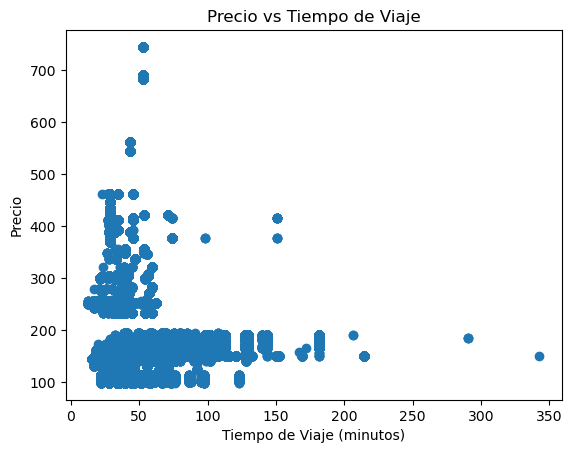

In [27]:

tiempo_de_viaje = resta.dt.total_seconds() / 60
plt.scatter(df_renfe_fo['precio'],tiempo_de_viaje)
plt.title('Precio vs Tiempo de Viaje')
plt.xlabel('Tiempo de Viaje (minutos)')
plt.ylabel('Precio')
plt.show()

### P14.2: Haz un boxplot de precio vs. dia de la semana

C:\Users\veneg\AppData\Local\Temp\ipykernel_2784\3038101451.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'Precio')

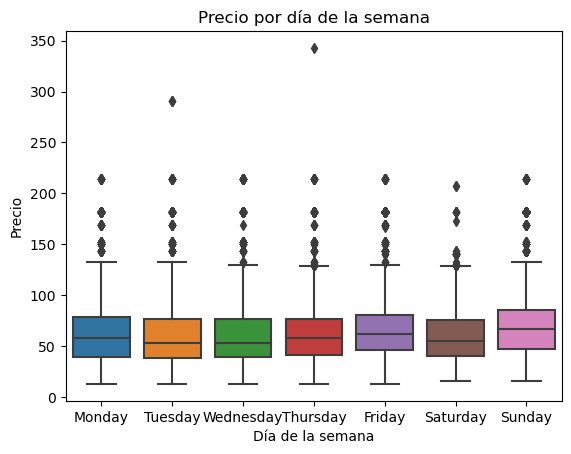

In [28]:
orden_dias = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}


df_renfe_fo['dia_semana'] = pd.Categorical(df_renfe_fo['dia_semana'], categories=sorted(orden_dias, key=orden_dias.get), ordered=True)


sns.boxplot(x=df_renfe_fo['dia_semana'], y=df_renfe_fo['precio'])
plt.title('Precio por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Precio')

In [29]:
print(df_renfe_fo.head())

       fecha_consulta        fecha_inicio           fecha_fin ciudad_origen  \
0 2019-05-25 01:43:03 2019-06-28 20:36:00 2019-06-28 23:14:00       SEVILLA   
1 2019-06-22 13:05:11 2019-07-14 10:00:00 2019-07-14 13:10:00     BARCELONA   
2 2019-04-17 06:24:03 2019-05-23 13:40:00 2019-05-23 16:10:00       SEVILLA   
3 2019-05-10 21:21:59 2019-05-29 14:50:00 2019-05-29 22:30:00      VALENCIA   
4 2019-05-09 19:43:37 2019-06-26 13:25:00 2019-06-26 16:24:00        MADRID   

  ciudad_destino tipo_tren tipo_tarifa    clase  precio   hora  dia   mes  \
0         MADRID     ALVIA    Flexible  Turista   67.20  20:36   28  June   
1         MADRID       AVE    Flexible  Turista  107.70  10:00   14  July   
2         MADRID       AVE       Promo  Turista   47.30  13:40   23   May   
3         MADRID  REGIONAL  Adulto ida  Turista   28.35  14:50   29   May   
4      BARCELONA   AVE-TGV       Promo  Turista   66.75  13:25   26  June   

  dia_semana  
0     Friday  
1     Sunday  
2   Thursday  
3 

### P14.3: Gráfica el precio medio por día de la semana

In [30]:
renfe_mediapordia = df_renfe_fo.groupby('dia_semana')['precio'].mean().reset_index()
print(renfe_mediapordia)


  dia_semana     precio
0     Monday  61.026277
1    Tuesday  57.785029
2  Wednesday  58.994769
3   Thursday  60.703694
4     Friday  65.742630
5   Saturday  57.657797
6     Sunday  67.856354


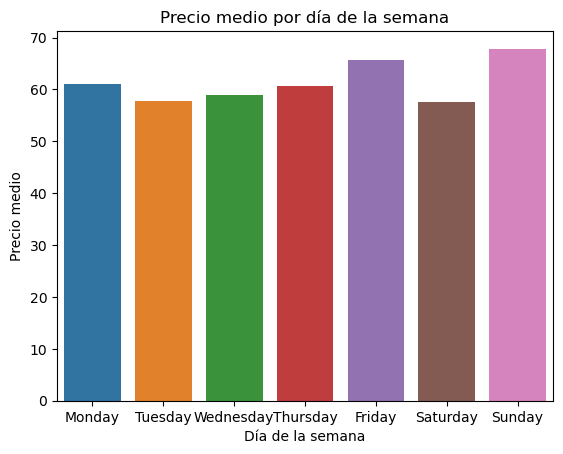

In [31]:
sns.barplot(x='dia_semana', y='precio', data=renfe_mediapordia)
plt.title('Precio medio por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Precio medio')
plt.show()

## P15: Crea un nuevo dataframe donge apliques *one-hot-encoding* a las variables categoricas

In [32]:
#Creamos un dataframe de one-hot-encoding exclusivamente con las variables categóricas
df_one_hot_encoding = pd.get_dummies(renfe_join[['ciudad_origen', 'ciudad_destino', 'tipo_tren', 'tipo_tarifa', 'clase']])
print(df_one_hot_encoding.head())
        

   ciudad_origen_BARCELONA  ciudad_origen_MADRID  ciudad_origen_PONFERRADA  \
0                        0                     0                         0   
1                        1                     0                         0   
2                        0                     0                         0   
3                        0                     0                         0   
4                        0                     0                         0   

   ciudad_origen_SEVILLA  ciudad_origen_VALENCIA  ciudad_destino_BARCELONA  \
0                      1                       0                         0   
1                      0                       0                         0   
2                      1                       0                         0   
3                      0                       1                         0   
4                      1                       0                         0   

   ciudad_destino_MADRID  ciudad_destino_PONFERRADA  ciudad_de